In [109]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os, glob
%matplotlib inline

In [189]:
df = pd.read_csv("combined_csv_data_obj_1.csv", sep = ',', header = None)
df

,0,1,2,3,4,5,6,7,8,9,...,48806,48807,48808,48809,48810,48811,48812,48813,48814,48815
0,NaN,Unnamed: 0,1,4,1.1,-1,28,28.1,26,25,...,1212.1,1154.1,755.2,-893.1,-369.4,-241.3,-41.11,-41.111,-41.112,Unnamed: 18143


In [190]:
a_dataframe = df.T
a_dataframe

,0
0,NaN
1,Unnamed: 0
2,1
3,4
4,1.1
...,...
48811,-241.3
48812,-41.11
48813,-41.111
48814,-41.112


In [191]:
a_dataframe

,0
0,NaN
1,Unnamed: 0
2,1
3,4
4,1.1
...,...
48811,-241.3
48812,-41.11
48813,-41.111
48814,-41.112


In [192]:
a_dataframe = a_dataframe[a_dataframe[[0]].applymap(np.isreal).all(1)]
a_dataframe

,0
0,NaN
2,1
3,4
4,1.1
5,-1
...,...
48810,-369.4
48811,-241.3
48812,-41.11
48813,-41.111


In [194]:
a_dataframe["Target"] = 1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [195]:
a_dataframe
nan_value = float("NaN")

a_dataframe.replace("", nan_value, inplace=True)
a_dataframe.replace("Unnamed: 18143", nan_value, inplace=True)
a_dataframe.dropna(subset = [0], inplace=True)
a_dataframe

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:4530: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,0,Target
2,1,1
3,4,1
4,1.1,1
5,-1,1
6,28,1
...,...,...
48810,-369.4,1
48811,-241.3,1
48812,-41.11,1
48813,-41.111,1


## Time to process data of object 2

In [198]:
df_obj_2 = pd.read_csv("combined_csv_data_obj_2.csv", sep = ',', header = None)
df_obj_2

,0,1,2,3,4,5,6,7,8,9,...,55062,55063,55064,55065,55066,55067,55068,55069,55070,55071
0,NaN,Unnamed: 0,-6,-9,-3,-1,-45,-36,-30,-26,...,-252.6,241.5,222.5,222.6,130.17,130.18,231.6,-113.23,-113.24,-151.13


In [627]:
b_dataframe = df_obj_2.T
b_dataframe = b_dataframe[b_dataframe[[0]].applymap(np.isreal).all(1)]
# b_dataframe["Target"] = 0
b_dataframe

,0
0,NaN
2,-6
3,-9
4,-3
5,-1
...,...
55067,130.18
55068,231.6
55069,-113.23
55070,-113.24


In [212]:
nan_value = float("NaN")

b_dataframe.replace("", nan_value, inplace=True)
b_dataframe.dropna(subset = [0], inplace=True)
b_dataframe

,0,Target
2,-6,0
3,-9,0
4,-3,0
5,-1,0
6,-45,0
...,...,...
55067,130.18,0
55068,231.6,0
55069,-113.23,0
55070,-113.24,0


## Now lets merge two data sets together

In [213]:
frames = [a_dataframe, b_dataframe]
result = pd.concat(frames)
result
result[0].isnull().values.any()

False

In [214]:
result

,0,Target
2,1,1
3,4,1
4,1.1,1
5,-1,1
6,28,1
...,...,...
55067,130.18,0
55068,231.6,0
55069,-113.23,0
55070,-113.24,0


In [215]:
X = result.drop("Target", axis =1)

In [216]:
y = result["Target"]
y

# X = X.apply(pd.to_numeric, errors='coerce')
# y = y.apply(pd.to_numeric, errors='coerce')

2        1
3        1
4        1
5        1
6        1
        ..
55067    0
55068    0
55069    0
55070    0
55071    0
Name: Target, Length: 103773, dtype: int64

In [217]:
X
# nan_value = float("NaN")
# X.replace("", nan_value, inplace=True)
# X.dropna(subset = [0], inplace=True)
X[0].isnull().values.any()  #46620

False

In [218]:
len(y)

103773

In [219]:
len(X)

103773

In [253]:
from sklearn.model_selection import train_test_split, cross_val_score

# Now splitting the data to test and training sets, its important never let our model to learn from test.

np.random.seed(42)

# split in train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) # 20 % data to be used for testing

## Time to build the machine learning model

In [254]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# put models in the dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier(),
         "Decission Tree": tree.DecisionTreeClassifier()}

# Create a function to fit and score models
# fits and evaluates the machine learning models
# X_train: training data(no labels)
# X_test: testing data(no labels)
# y_train: training labels
# y_test: testing labels
def fit_and_score(models, X_train, X_test, y_train, y_test):
    
    # set a random seed
    np.random.seed(42)
    #Male a dictionary to keep model scores
    model_scores = {}
    #loop through models
    for name, model in models.items():
        # fit the mdoel to the data
        model.fit(X_train, y_train)
        # evaluate the mdoel and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [255]:
model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
model_scores

{'Logistic Regression': 0.5249819320645628,
 'KNN': 0.31674295350517945,
 'Random Forest': 0.19826547819802456,
 'Decission Tree': 0.19884365213201638}

In [256]:
models["Logistic Regression"].predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

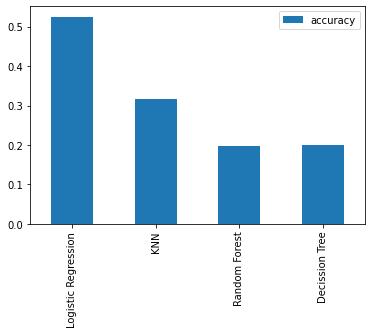

In [257]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

### Optimizing the model

1. The above classification was performed on original data. Lets Constrain the range between 0 and 1 and see if the accuracy is improved.

In [258]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

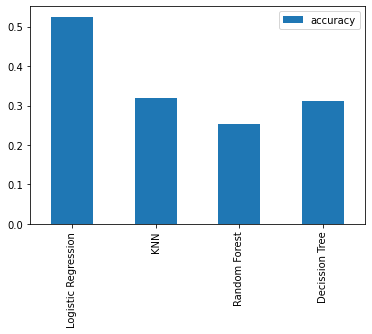

In [261]:
model_scores = fit_and_score(models=models, X_train=X_train_scaler, X_test=X_test_scaler, y_train=y_train, y_test=y_test)
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

In [262]:
model_scores

{'Logistic Regression': 0.5249819320645628,
 'KNN': 0.3190556492411467,
 'Random Forest': 0.25227655986509273,
 'Decission Tree': 0.3126475548060708}

## Second way to use RandomForestGRID

In [263]:
# Create hyperparameter grid for Logisticregression
log_reg_grid = {"C": np.logspace(-4, 4, 20), 
               "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1, 20, 2)}

In [264]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for logisticregression

rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv=5, n_iter=100, verbose=True)

# fit random hyperparameter search model for logistic regression
rs_log_reg.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 20 is smaller than n_iter=100. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.9s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [265]:
rs_log_reg.score(X_test, y_test)

0.5249819320645628

In [266]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.0001}

### Lest do by GRIDSearchCV

In [267]:
log_reg_grid = {"C": np.logspace(-4, 4, 30),
               "solver":["liblinear"]}

# Setup grid hyperparamter seach for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid,
                         cv=5, verbose=True)

# Fit grid hyperparmater search mdoel
gs_log_reg.fit(X_train, y_train);

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   12.8s finished


In [268]:
#  Check the best hyperpaprameters
gs_log_reg.best_params_

{'C': 0.0001, 'solver': 'liblinear'}

In [269]:
gs_log_reg.score(X_test, y_test)

0.5249819320645628

### Hmm After couple of tries unable to tune much, lets see if we can figure something our after visualizing the data

In [283]:
# import seaborn as sns

# sns.scatterplot(data=data, x='X_Train', y='Second', hue='Target', style='Admitted')
# fig.set_size_inches(15, 10)
# plt.show()

In [371]:
# from scipy import signal
# import matplotlib.pyplot as plt

# f, t, Sxx = signal.spectrogram(X)
# plt.plot(Sxx)
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')
# plt.show()

## Main work starts here

In [368]:
import librosa
import librosa.display
import soundfile as sf
from scipy.signal import chirp, spectrogram, stft

signal_data = a_dataframe.drop("Target", axis =1).T.to_numpy()
f, t, Zxx = stft(signal_data)

In [389]:
arr = t[1:len(f)+1]
print(len(arr))

129


In [492]:
read_file = pd.read_excel('object2.xlsx', header = None)

# dataframe = dataframe[dataframe[[0]].applymap(np.isreal).all(1)].T
# nan_value = float("NaN")
# dataframe.replace("", nan_value, inplace=True)
# dataframe.dropna(subset = [0], inplace=True)
# dataframe = dataframe.T

# array = np.array(dataframe)
# array
# plt.specgram(array)
# f, t, Zxx = stft(dataframe)
print(read_file.shape)

(332, 16384)


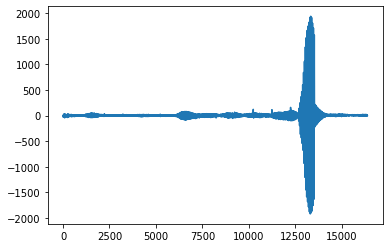

In [507]:
array_obj2 = np.array(read_file)
plt.plot(array_obj2[200]);

In [587]:
mfccs = librosa.feature.mfcc(array_obj2[2], sr=22050)

In [588]:
print(mfccs.shape)

(20, 33)


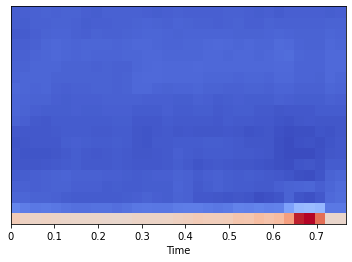

In [590]:
# Displaying the MFCCS:
librosa.display.specshow(mfccs, sr=22050, x_axis='time');

In [529]:
array_obj2.shape

(332, 16384)

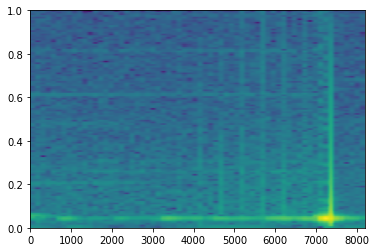

In [524]:
spectrum, freqs, t, im = plt.specgram(array_obj2[2], NFFT=256, Fs=2, noverlap=0);

ParameterError: Audio buffer is not finite everywhere

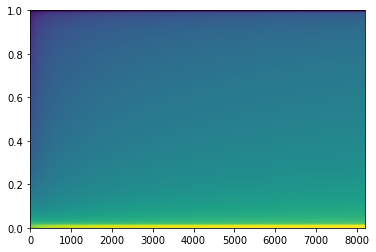

In [632]:
max_values_obj2 = []
mfccs_obj2 = []
max_value = 0;

for i in range(array_obj2.shape[0]):
    spectrum, freqs, t, im = plt.specgram(array_obj2[i], NFFT=256, Fs=2, noverlap=0);
    max_value = np.amax(abs(spectrum[0]))
    mfccs = librosa.feature.mfcc(array_obj2[i], sr=22050)
    max_values_obj2.append(max_value)
    mfccs_obj2.append(mfccs)
    
len(mfccs_obj2)
# plt.plot(mfccs_obj2[2:]);

332

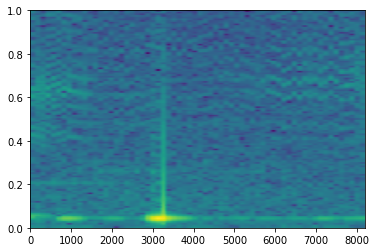

In [535]:
# mean_freq = []
# mean_ = 0;

# for i in range(array_obj2.shape[0]):
#     spectrum, freqs, t, im = plt.specgram(array_obj2[i], NFFT=256, Fs=2, noverlap=0);
#     mean_ = np.sum(abs(spectrum[0]))/len(spectrum[0])
#     mean_freq.append(mean_)

# len(mean_freq)

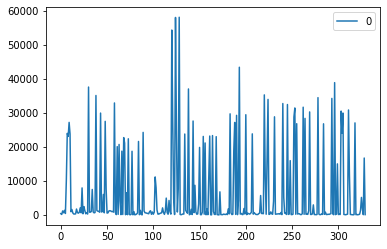

In [546]:
data_bar = pd.DataFrame(mean_freq[2:])
data_bar.plot();

# OBject 1 starting here

In [597]:
read_file = pd.read_excel('object1data.xlsx', header = None)

(241, 16384)


(241, 16384)

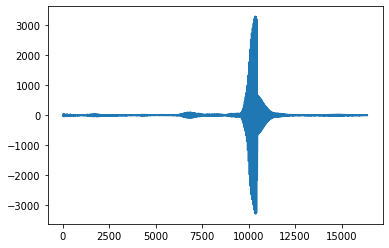

In [598]:
array_obj_one = np.array(read_file)
plt.plot(array_obj_one[2]);
print(read_file.shape)
array_obj_one.shape

array([400.37834055, 386.87350942, 372.29232746, 371.68827955,
       370.32146314, 366.03333023, 360.08082883, 360.72502574,
       360.17255836, 359.85615475, 361.64396676, 364.41932403,
       370.67998092, 370.13148821, 370.96900758, 370.05115989,
       384.70638496, 389.99417068, 426.73864317, 557.75673151,
       666.14556128, 648.27699516, 474.65230588, 356.35402908,
       350.60433357, 346.02368537, 347.72892003, 350.22886322,
       352.14245176, 349.98261791, 355.339161  , 354.53635217,
       349.08191129])

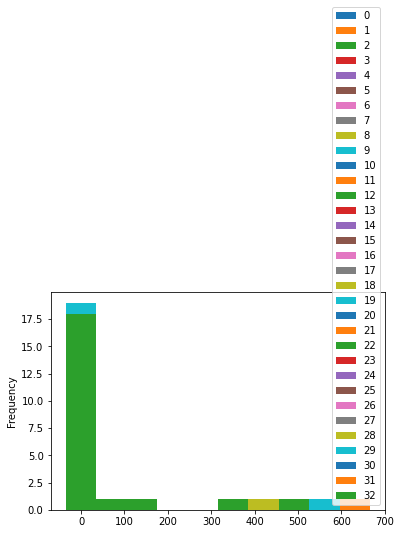

In [630]:
array_obj_one[4]
# array_obj2[4]
mfccs_obj1 = librosa.feature.mfcc(np.float64(array_obj_one[2]), sr=22050)
va_ = abs(mfccs_obj1)
# Displaying the MFCCS:
# librosa.display.specshow(mfccs_obj1, sr=22050, x_axis='time');
mfccs_obj1.shape
mc_data_frame = pd.DataFrame(mfccs_obj1)
mc_data_frame.plot.hist()
va_[0]

In [631]:
va_[1]

array([ 76.64588806,  62.77349602,  48.75383763,  50.79222093,
        49.30174815,  43.95035424,  41.37782204,  41.78797584,
        40.1450104 ,  41.17969725,  39.75714346,  42.51258764,
        48.39905906,  48.03812803,  47.83367081,  45.01097738,
        51.49268151,  55.62599583,  73.7332061 , 118.23527669,
       151.46030373, 159.08664208, 136.55995988,  46.547548  ,
        40.77228318,  34.49609173,  35.66828265,  36.53003574,
        34.24935027,  33.87853056,  35.50800229,  38.82784663,
        39.24987132])

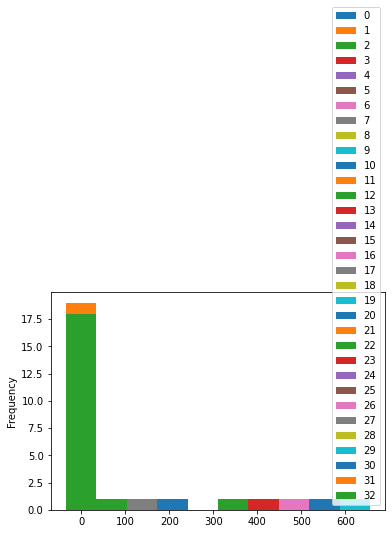

In [624]:
mfccs = librosa.feature.mfcc(array_obj2[4], sr=22050)
mccs_data_frame = pd.DataFrame(mfccs)
mccs_data_frame.plot.hist()

# Displaying the MFCCS:
#librosa.display.specshow(mfccs, sr=22050, x_axis='time');

In [622]:
plt.scatter(mfccs_obj1, color = 'red')

TypeError: scatter() missing 1 required positional argument: 'y'

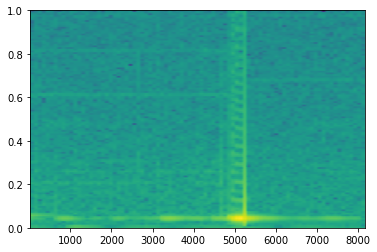

In [519]:
plt.specgram(array_obj_one[2], NFFT=256, Fs=2, noverlap=64);

241

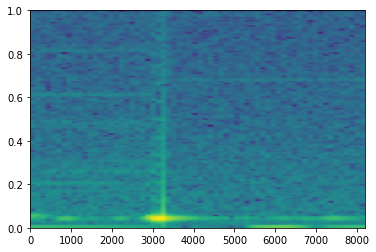

In [548]:
mean_freq = []
mean_ = 0;

for i in range(array_obj_one.shape[0]):
    spectrum, freqs, t, im = plt.specgram(array_obj_one[i], NFFT=256, Fs=2, noverlap=0);
    mean_ = np.sum(abs(spectrum[0]))/len(spectrum[0])
    mean_freq.append(mean_)

len(mean_freq)

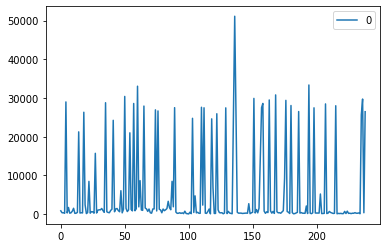

In [549]:
data_bar = pd.DataFrame(mean_freq[2:])
data_bar.plot();

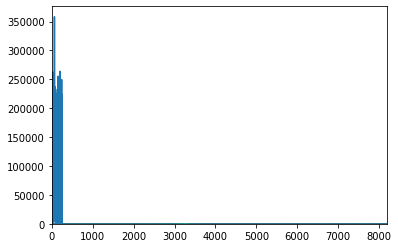

In [560]:
max_values_obj1 = []
max_value = 0;

for i in range(array_obj_one.shape[0]):
    spectrum, freqs, t, im = plt.specgram(array_obj_one[i], NFFT=256, Fs=2, noverlap=0);
    max_value = np.amax(abs(spectrum[0]))
    max_values_obj1.append(max_value)

len(max_values)
plt.plot(max_values_obj1[1:])

In [567]:
max_freq_dataframe_obj_one = pd.DataFrame(max_values_obj1[1:], columns=["MaxFrequency"])
max_freq_dataframe_obj_two = pd.DataFrame(max_values_obj2[2:], columns=["MaxFrequency"])

In [569]:
max_freq_dataframe_obj_one["Target"] = 1
max_freq_dataframe_obj_one

,MaxFrequency,Target
0,1413.461802,1
1,10315.358221,1
2,3422.275998,1
3,6976.451998,1
4,2041.878745,1
...,...,...
235,751.020766,1
236,238482.571128,1
237,249616.424630,1
238,1212.682433,1


In [572]:
max_freq_dataframe_obj_two["Target"] = 0
max_freq_dataframe_obj_two

,MaxFrequency,Target
0,6860.328006,0
1,1708.566732,0
2,57451.131970,0
3,27462.667350,0
4,49835.018570,0
...,...,...
325,23740.291568,0
326,7433.396133,0
327,717.293777,0
328,107224.186211,0


In [577]:
frames = [max_freq_dataframe_obj_one, max_freq_dataframe_obj_two]
final_data_frame = pd.concat(frames)
final_data_frame

,MaxFrequency,Target
0,1413.461802,1
1,10315.358221,1
2,3422.275998,1
3,6976.451998,1
4,2041.878745,1
...,...,...
325,23740.291568,0
326,7433.396133,0
327,717.293777,0
328,107224.186211,0


In [578]:
from sklearn.model_selection import train_test_split, cross_val_score

# Now splitting the data to test and training sets, its important never let our model to learn from test.
X = final_data_frame.drop("Target", axis =1)
y = final_data_frame["Target"]
np.random.seed(42)

# split in train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) # 20 % data to be used for testing

In [579]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# put models in the dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier(),
         "Decission Tree": tree.DecisionTreeClassifier()}

# Create a function to fit and score models
# fits and evaluates the machine learning models
# X_train: training data(no labels)
# X_test: testing data(no labels)
# y_train: training labels
# y_test: testing labels
def fit_and_score(models, X_train, X_test, y_train, y_test):
    
    # set a random seed
    np.random.seed(42)
    #Male a dictionary to keep model scores
    model_scores = {}
    #loop through models
    for name, model in models.items():
        # fit the mdoel to the data
        model.fit(X_train, y_train)
        # evaluate the mdoel and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [580]:
model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
model_scores

{'Logistic Regression': 0.5350877192982456,
 'KNN': 0.5789473684210527,
 'Random Forest': 0.5350877192982456,
 'Decission Tree': 0.5350877192982456}

In [582]:
y

0      1
1      1
2      1
3      1
4      1
      ..
325    0
326    0
327    0
328    0
329    0
Name: Target, Length: 570, dtype: int64

In [477]:
# read_file = pd.read_csv('combined_csv_data_obj_2.csv', header = None).T
# b_dataframe.to_excel(r'/Users/brian/Desktop/Discrimination-of-reflected-sound-signals/file.xlsx', index=None)
# d_f_2 = pd.read_excel (r'/Users/brian/Desktop/Discrimination-of-reflected-sound-signals/file.xlsx')

In [321]:
# audio_signal = a_dataframe.drop("Target", axis =1)
# audio_signal = audio_signal.T

In [325]:
# audio_signal = audio_signal.to_numpy()